# Multiple Linear Regression

## Car Price Case Study

### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. 
Essentially,The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car


### Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the Car Price dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
CarPrice = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
# Check the head of the dataset
CarPrice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Inspect the various aspects of the CarPrice dataframe

In [5]:
CarPrice.shape

(205, 26)

In [6]:
CarPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [7]:
CarPrice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

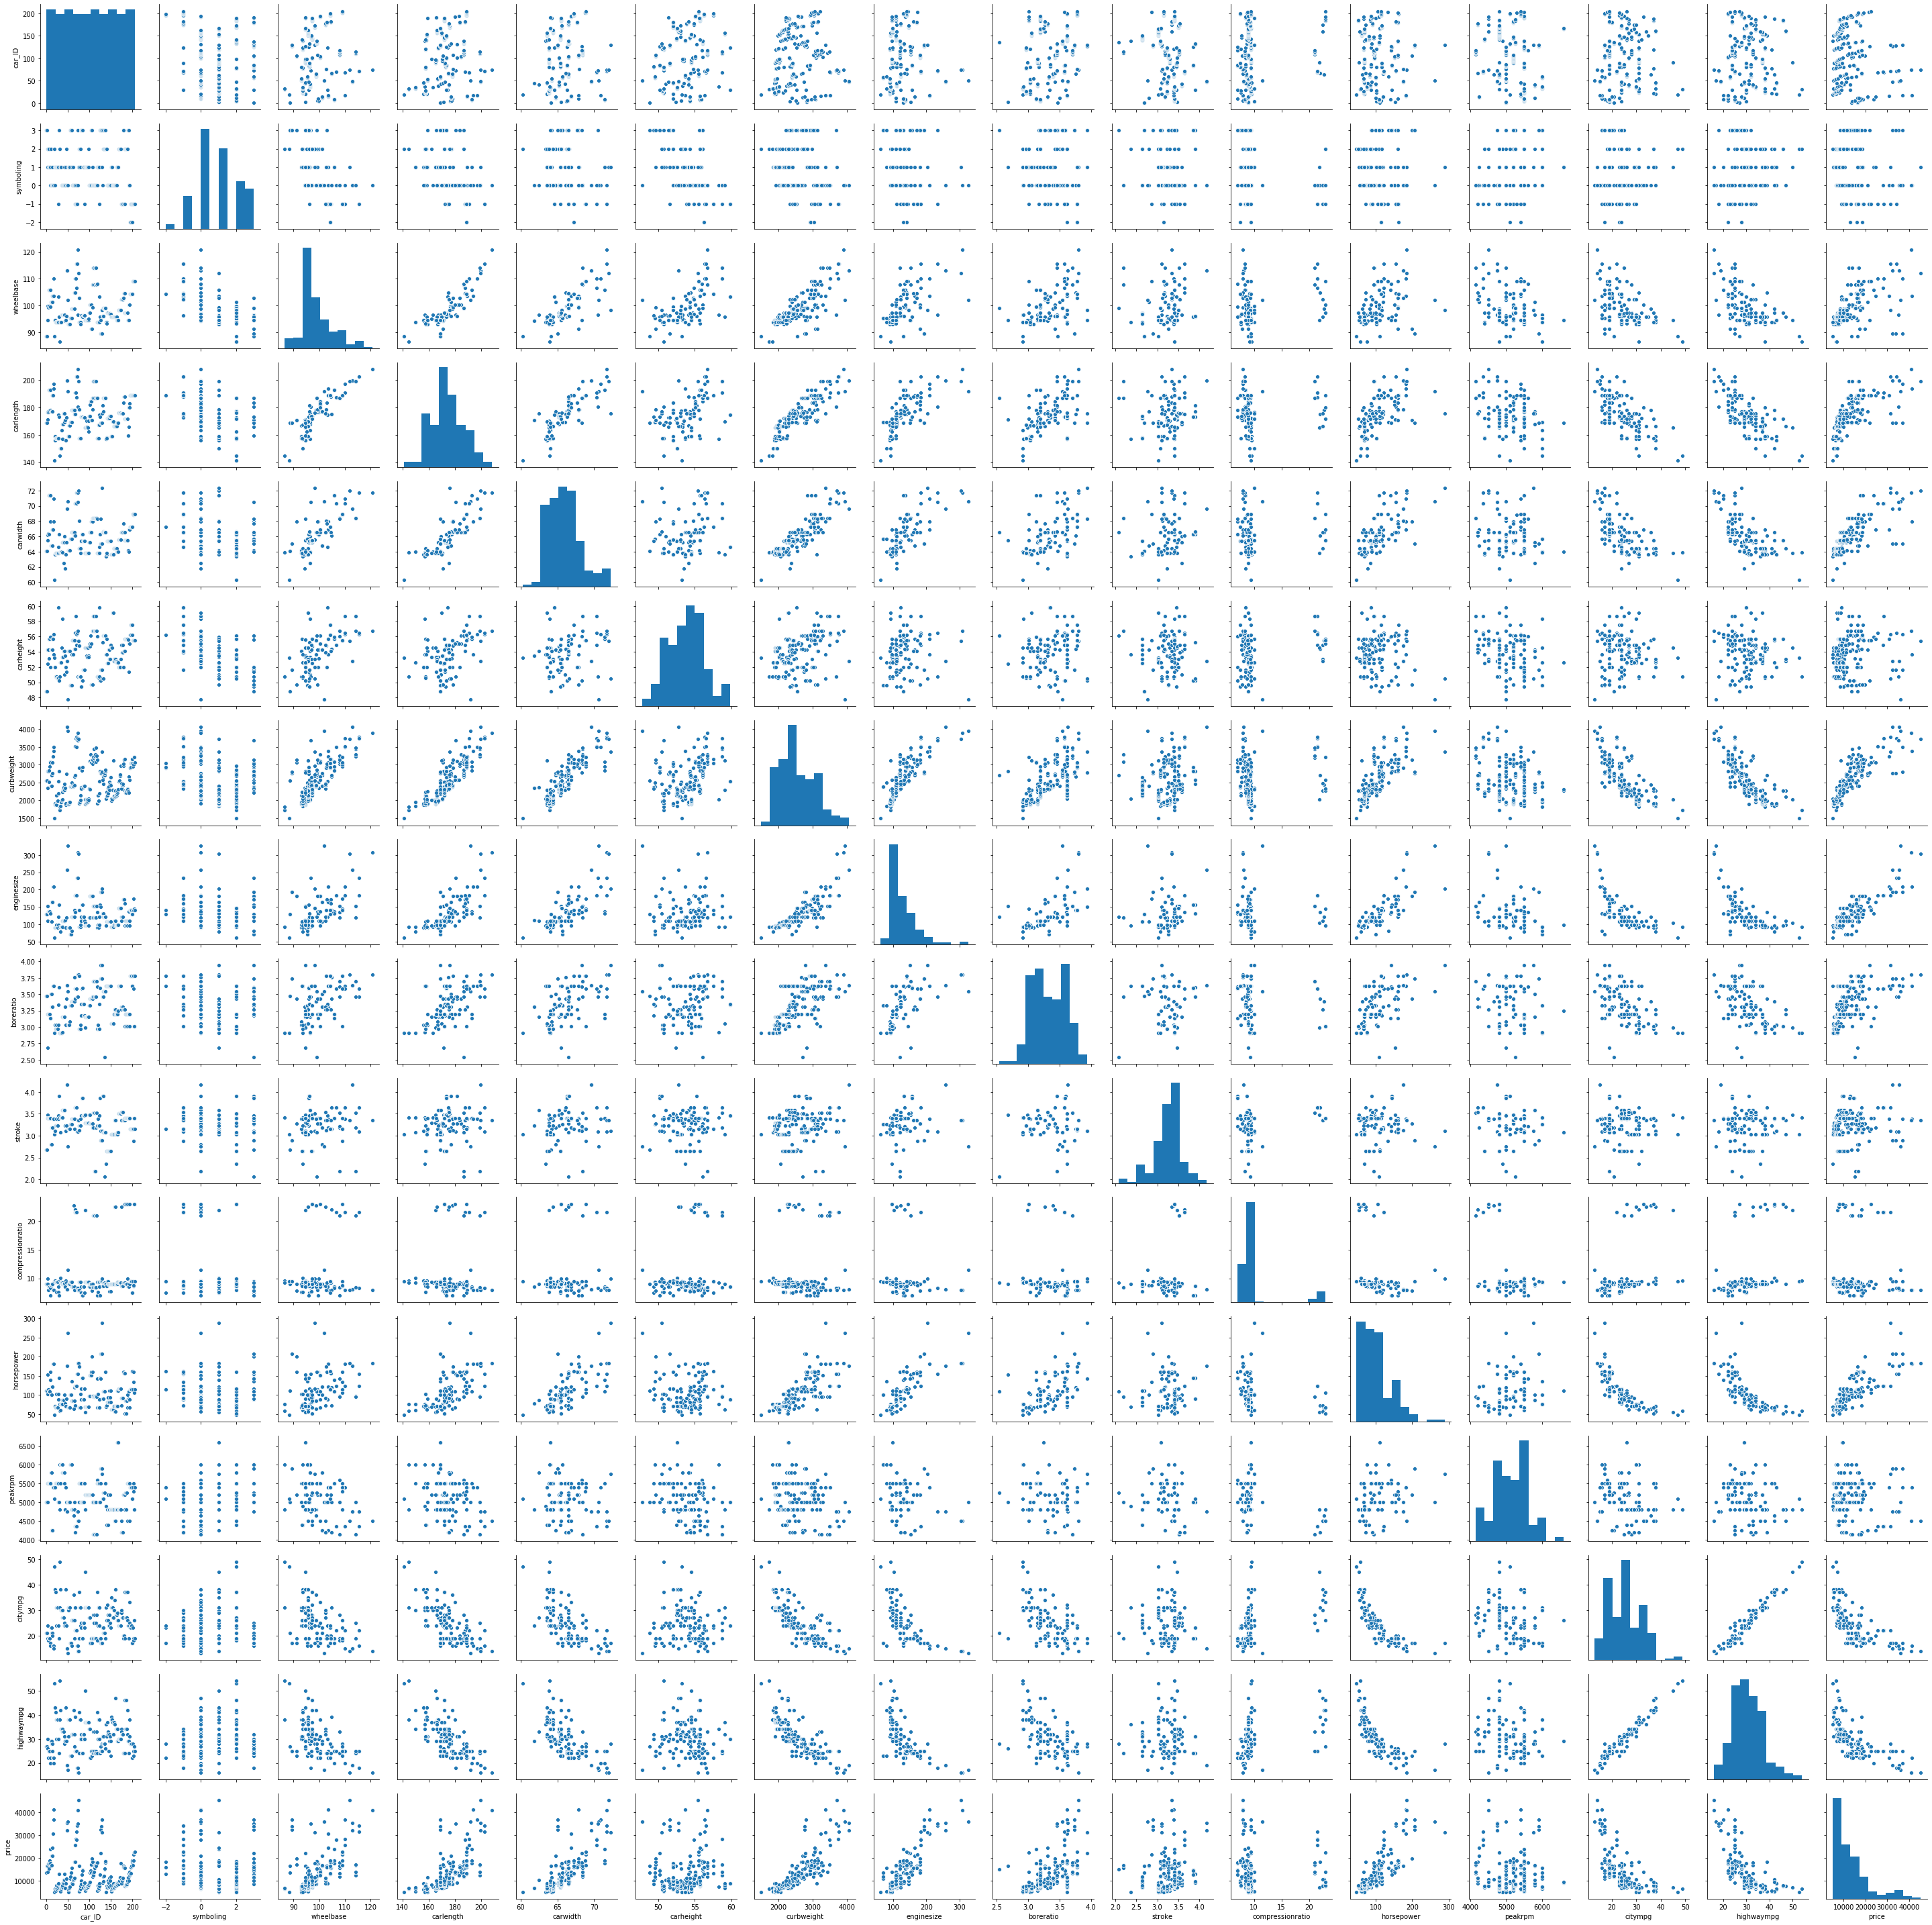

In [9]:
sns.pairplot(CarPrice)
plt.show()

- enginesize, curbweight, horsepower, wheelbase,boreratio - seem to have a significant positive correlation with price.
- citympg, highwaympg - seem to have a significant negative correlation with price.

In [10]:
np.corrcoef(CarPrice['carlength'], CarPrice['carwidth'])[0, 1]

0.8411182684818455

In [11]:
np.corrcoef(CarPrice['boreratio'], CarPrice['price'])[0, 1]

0.5531732367984435

In [12]:
np.corrcoef(CarPrice['carlength'], CarPrice['wheelbase'])[0, 1]

0.8745874759642632

In [13]:
np.corrcoef(CarPrice['citympg'], CarPrice['highwaympg'])[0, 1]

0.9713370423425045

In [14]:
np.corrcoef(CarPrice['carwidth'], CarPrice['enginesize'])[0, 1]

0.7354334047796368

In [15]:
#Binning the Car Companies based on avg prices of each Company.
CarPrice['price'] = CarPrice['price'].astype('int')
temp = CarPrice.copy()
table = temp.groupby(['CarName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CarName')
bins = [0,15000,25000,40000]
cars_bin=['economy','normal','highend']
CarPrice['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
CarPrice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carsrange
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,economy
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,normal
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,normal
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,economy
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,normal


In [16]:
CarPrice["CarName"]= CarPrice["CarName"].astype(str) 
  
# creating new column with element at 0th position in data["CarName"] 
CarPrice["Car"]= CarPrice["CarName"].str.split(" ", 1) 
CarPrice["CarCompany"] = CarPrice["Car"].str.get(0)
CarPrice.drop(['CarName','Car'], axis=1)


,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carsrange,CarCompany
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.00,111,5000,21,27,13495,economy,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.00,111,5000,21,27,16500,normal,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.00,154,5000,19,26,16500,normal,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.00,102,5500,24,30,13950,economy,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.00,115,5500,18,22,17450,normal,audi
5,6,2,gas,std,two,sedan,fwd,front,99.8,177.3,...,3.19,3.40,8.50,110,5500,19,25,15250,normal,audi
6,7,1,gas,std,four,sedan,fwd,front,105.8,192.7,...,3.19,3.40,8.50,110,5500,19,25,17710,normal,audi
7,8,1,gas,std,four,wagon,fwd,front,105.8,192.7,...,3.19,3.40,8.50,110,5500,19,25,18920,normal,audi
8,9,1,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,3.13,3.40,8.30,140,5500,17,20,23875,normal,audi
9,10,0,gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,3.13,3.40,7.00,160,5500,16,22,17859,normal,audi


In [17]:
CarPrice.CarCompany = CarPrice.CarCompany.apply(lambda x: x.lower())
CarPrice['CarCompany']=CarPrice['CarCompany'].str.lower()

In [18]:
#Finding spelling mistakes
CarPrice.CarCompany.value_counts()

toyota         31
nissan         18
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
jaguar          3
alfa-romero     3
chevrolet       3
vw              2
maxda           2
renault         2
mercury         1
vokswagen       1
porcshce        1
toyouta         1
Name: CarCompany, dtype: int64

In [19]:
CarPrice.CarCompany.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [20]:
def replace_name(a,b):
    CarPrice.CarCompany.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')


#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

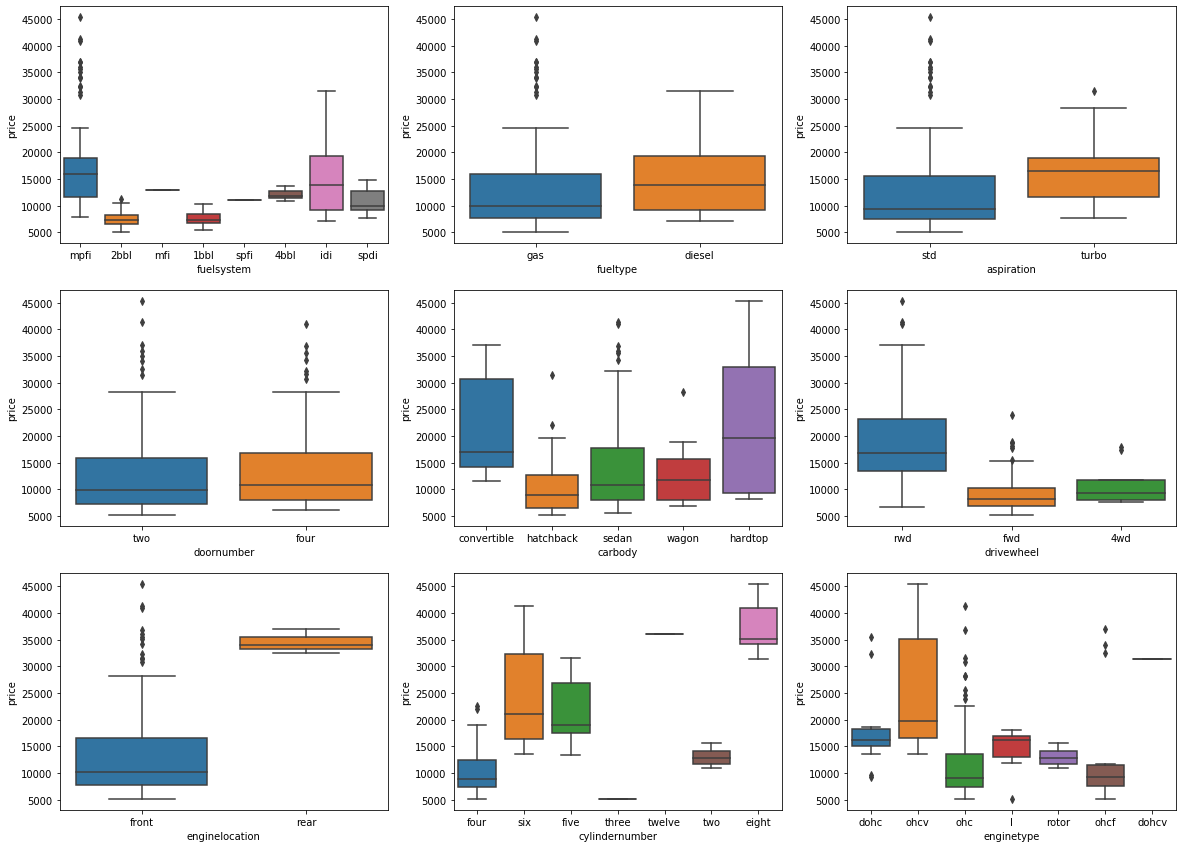

In [21]:
plt.figure(figsize=(20, 20))
plt.subplot(4,3,1)
sns.boxplot(x = 'fuelsystem', y = 'price', data = CarPrice)
plt.subplot(4,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = CarPrice)
plt.subplot(4,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = CarPrice)
plt.subplot(4,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = CarPrice)
plt.subplot(4,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = CarPrice)
plt.subplot(4,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = CarPrice)
plt.subplot(4,3,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = CarPrice)
plt.subplot(4,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = CarPrice)
plt.subplot(4,3,9)
sns.boxplot(x = 'enginetype', y = 'price', data = CarPrice)

plt.show()

List of significant variables after Visual analysis :
- Fueltype 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel
- enginelocation
- enginetype
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- carsrange


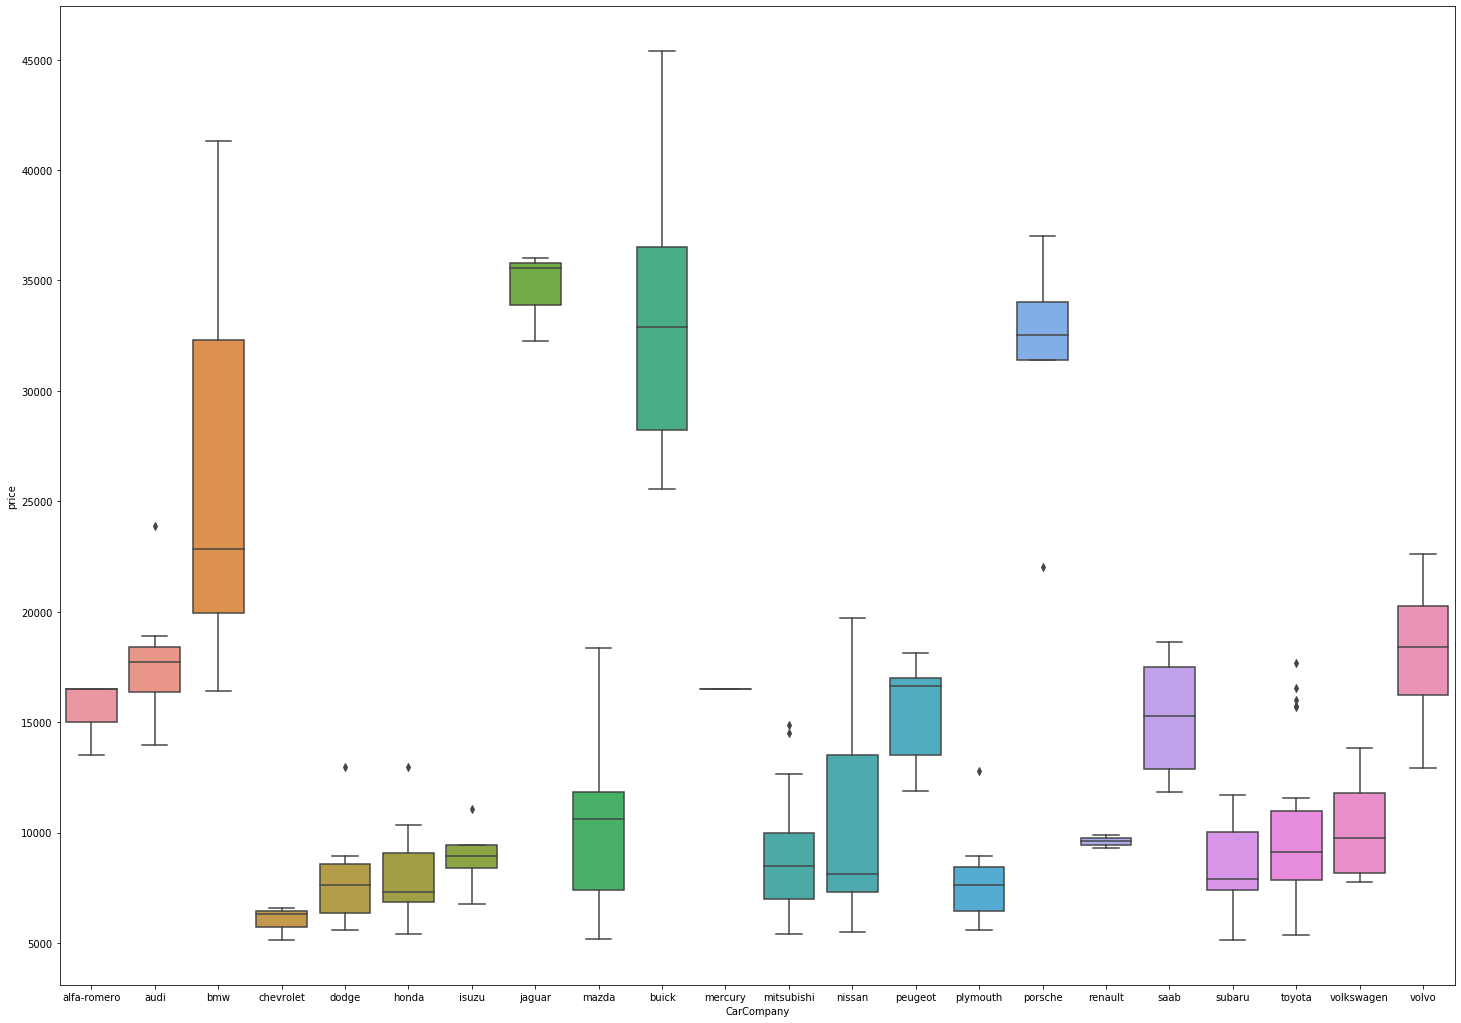

In [22]:

plt.figure(figsize=(25, 18))
sns.boxplot(x = 'CarCompany', y = 'price', data = CarPrice)
plt.show()

In [23]:
cars_lr = CarPrice[['price', 'fueltype', 'aspiration','carbody','drivewheel','wheelbase',
                    'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio',
                    'horsepower','carlength','carwidth', 'carsrange']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1,economy
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1,normal
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,171.2,65.5,normal
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,176.6,66.2,economy
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,176.6,66.4,normal


In [24]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

In [25]:
cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)
cars_lr = dummies('carsrange',cars_lr)

In [26]:
cars_lr.head()


,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohcv,rotor,five,four,six,three,twelve,two,normal,highend
0,13495,88.6,2548,130,3.47,111,168.8,64.1,1,0,...,0,0,0,1,0,0,0,0,0,0
1,16500,88.6,2548,130,3.47,111,168.8,64.1,1,0,...,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,171.2,65.5,1,0,...,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,176.6,66.2,1,0,...,0,0,0,1,0,0,0,0,0,0
4,17450,99.4,2824,136,3.19,115,176.6,66.4,1,0,...,0,0,1,0,0,0,0,0,1,0


In [27]:
cars_lr.shape

(205, 30)

### Train-Test Split 

In [28]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [30]:
df_train.head()


,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohcv,rotor,five,four,six,three,twelve,two,normal,highend
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.426016,0.291667,1,0,...,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.452033,0.666667,1,0,...,0,0,0,1,0,0,0,0,1,0
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.448780,0.308333,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.450407,0.316667,1,0,...,0,0,0,1,0,0,0,0,1,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.775610,0.575000,1,1,...,0,0,0,1,0,0,0,0,1,0


In [31]:
df_train.describe()


,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohcv,rotor,five,four,six,three,twelve,two,normal,highend
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.411141,0.407878,0.241351,0.497946,0.227302,0.525476,0.461655,0.909091,0.181818,...,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.216783,0.083916
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.204848,0.184517,0.288490,0.387050,...,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.413502,0.278236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.399187,0.304167,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.502439,0.425000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.669919,0.550000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


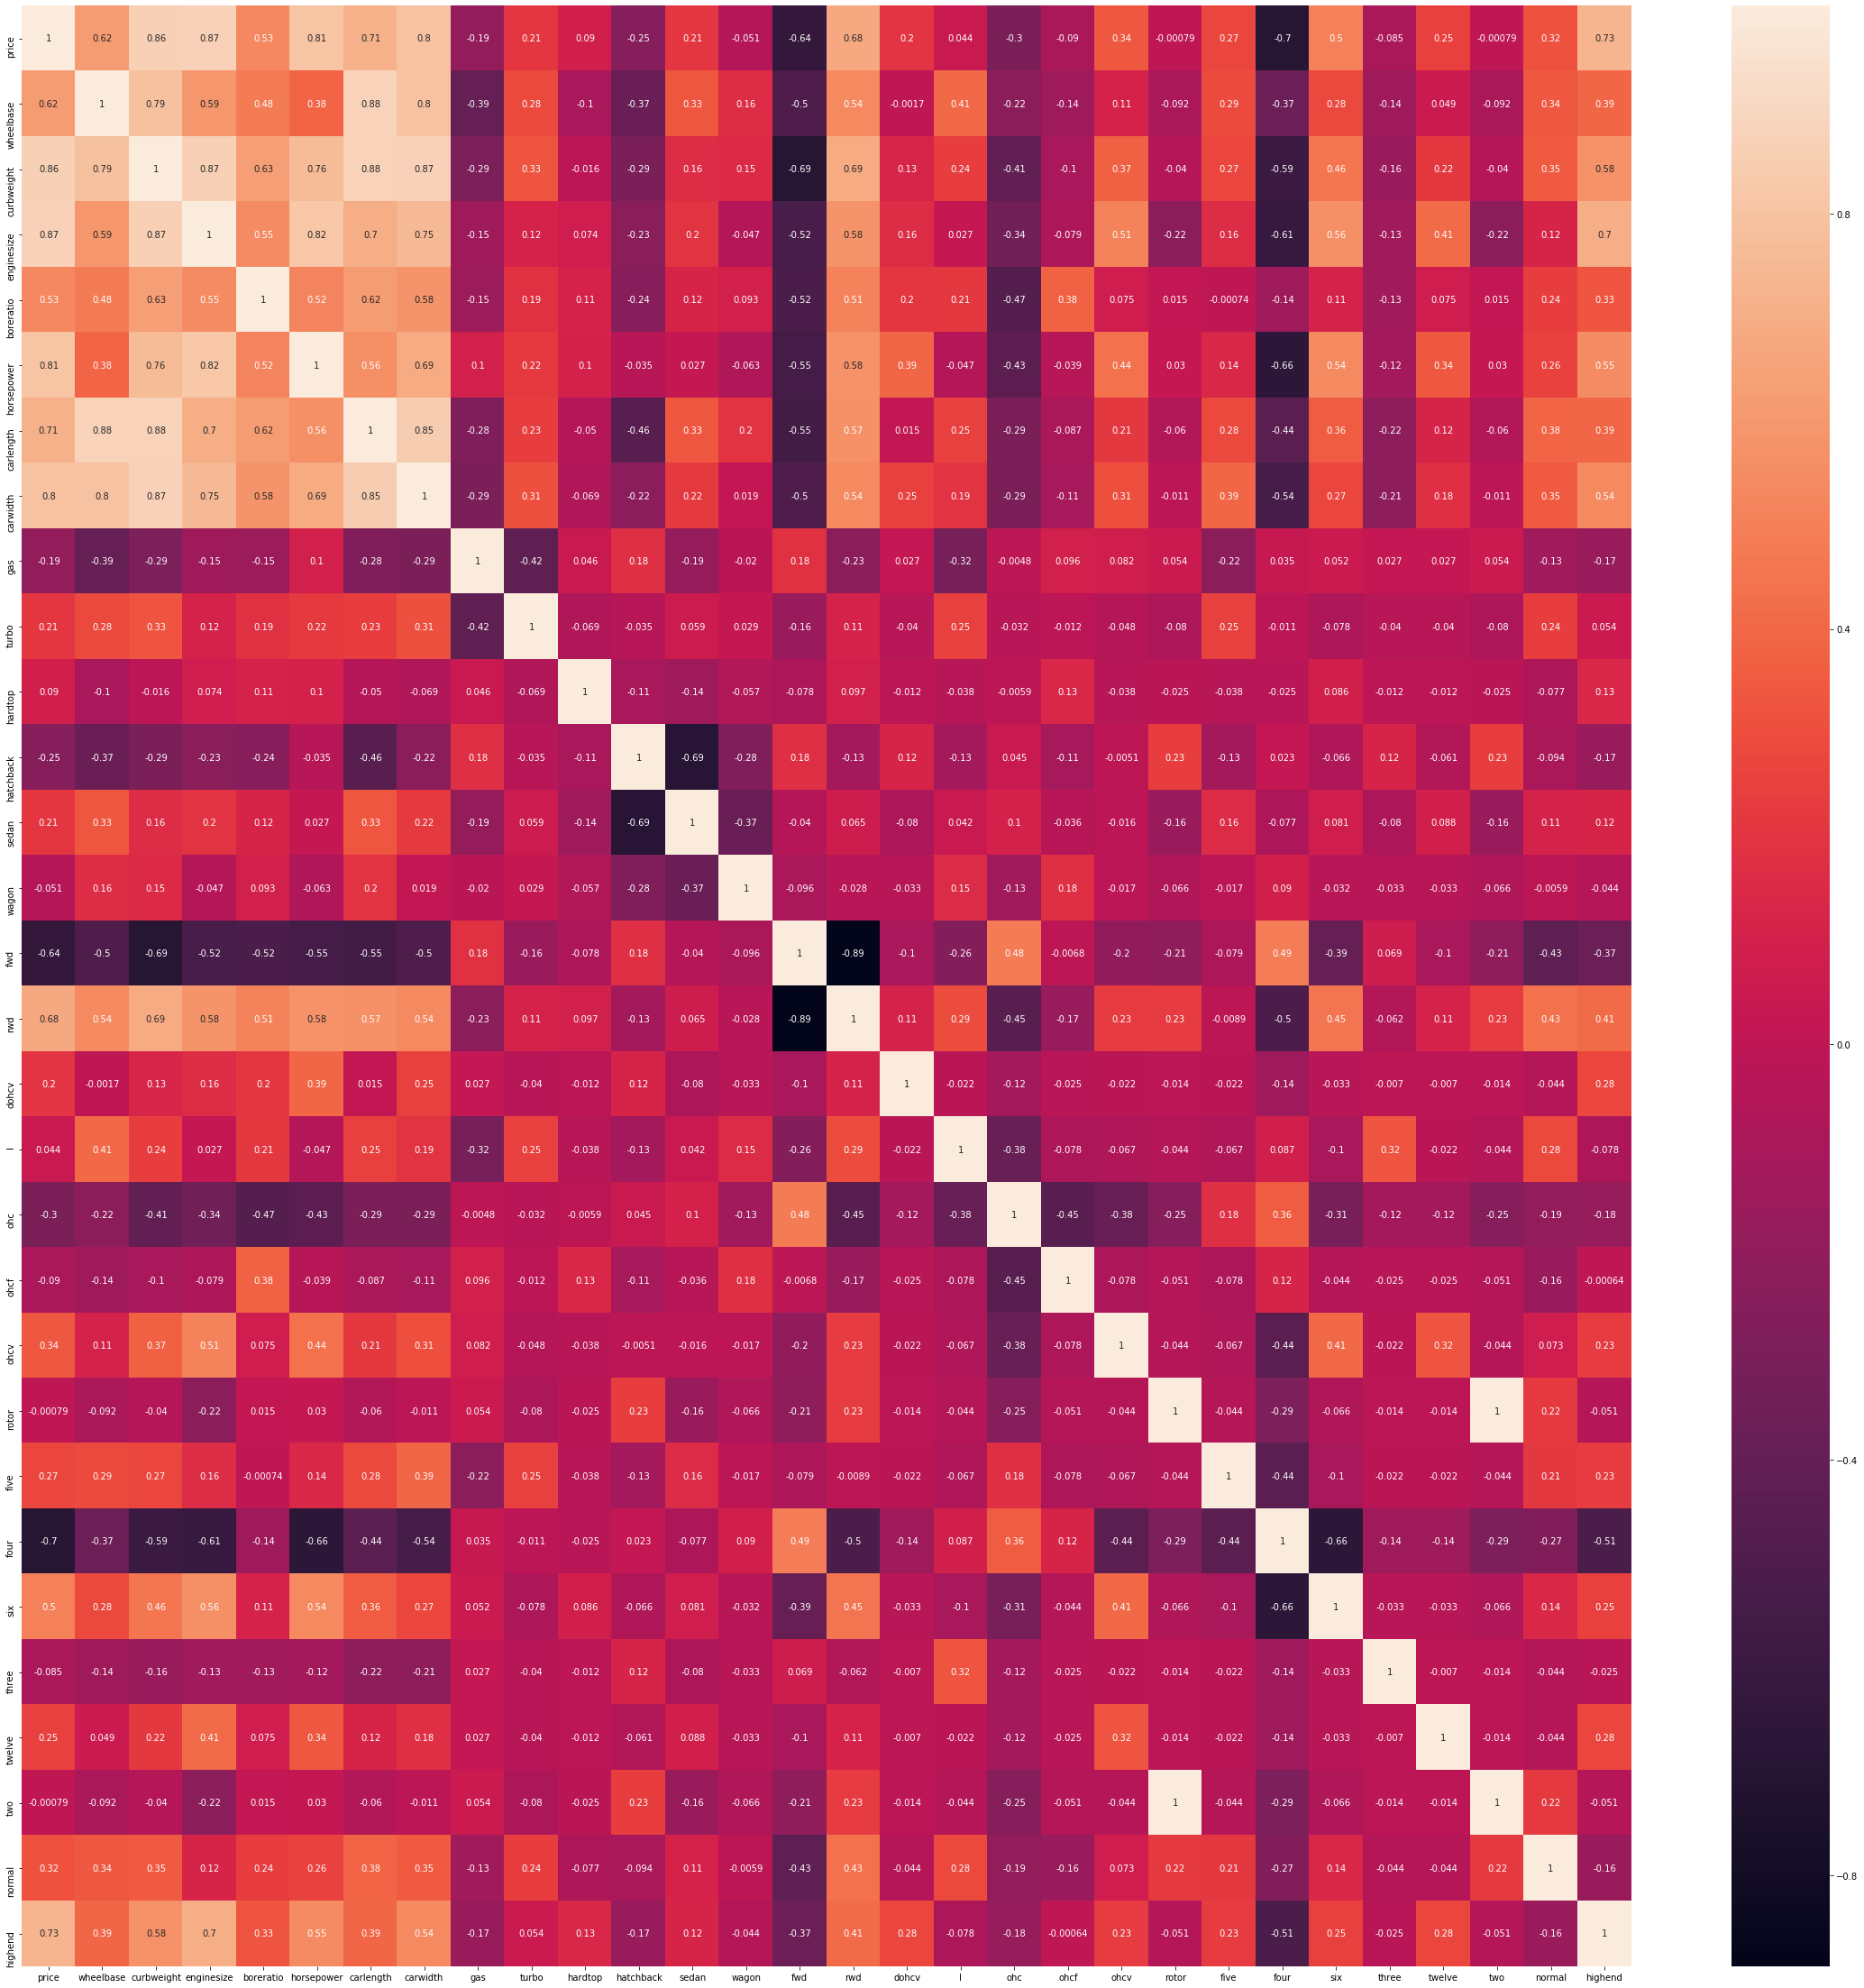

In [32]:
plt.figure(figsize = (40, 40))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

In [33]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

### Model Building


In [34]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [36]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 14),
 ('curbweight', True, 1),
 ('enginesize', False, 7),
 ('boreratio', False, 12),
 ('horsepower', True, 1),
 ('carlength', False, 9),
 ('carwidth', True, 1),
 ('gas', False, 16),
 ('turbo', False, 19),
 ('hardtop', False, 4),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 20),
 ('rwd', False, 13),
 ('dohcv', True, 1),
 ('l', False, 17),
 ('ohc', False, 3),
 ('ohcf', False, 5),
 ('ohcv', False, 8),
 ('rotor', False, 15),
 ('five', False, 2),
 ('four', True, 1),
 ('six', False, 11),
 ('three', True, 1),
 ('twelve', False, 10),
 ('two', False, 18),
 ('normal', False, 6),
 ('highend', True, 1)]

In [37]:
X_train.columns[rfe.support_]

Index(['curbweight', 'horsepower', 'carwidth', 'hatchback', 'sedan', 'wagon',
       'dohcv', 'four', 'three', 'highend'],
      dtype='object')

### Building model using statsmodel

In [38]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,horsepower,carwidth,hatchback,sedan,wagon,dohcv,four,three,highend
122,0.272692,0.083333,0.291667,0,1,0,0,1,0,0
125,0.500388,0.395833,0.666667,1,0,0,0,1,0,0
166,0.314973,0.266667,0.308333,1,0,0,0,1,0,0
1,0.411171,0.262500,0.316667,0,0,0,0,1,0,0
199,0.647401,0.475000,0.575000,0,0,1,0,1,0,0


In [39]:
def build_model(X,y):
    X = sm.add_constant(X) 
    lm = sm.OLS(y,X).fit() 
    print(lm.summary()) 
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

### MODEL 1

In [40]:
X_train_1 = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     105.0
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           8.48e-58
Time:                        19:06:32   Log-Likelihood:                 173.68
No. Observations:                 143   AIC:                            -325.4
Df Residuals:                     132   BIC:                            -292.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0379      0.045      0.850      0.3

##### p-vale of three (0.445) seems to be higher than the significance value of 0.05, hence dropping it.

In [41]:
X_train_1 = X_train_rfe.drop(["three"], axis = 1)

### MODEL 2

In [42]:
X_train_2 = build_model(X_train_1 , y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     116.9
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.02e-58
Time:                        19:06:32   Log-Likelihood:                 173.36
No. Observations:                 143   AIC:                            -326.7
Df Residuals:                     133   BIC:                            -297.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0477      0.043      1.121      0.2

##### p-vale of dohcv (0.102) seems to be higher than the significance value of 0.05, hence dropping it.


In [43]:
X_train_2 = X_train_1.drop(['dohcv'], axis = 1)

### MODEL 3

In [44]:
X_train_3 = build_model(X_train_2 , y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     129.6
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           3.29e-59
Time:                        19:06:32   Log-Likelihood:                 171.92
No. Observations:                 143   AIC:                            -325.8
Df Residuals:                     134   BIC:                            -299.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0634      0.042      1.519      0.1

In [45]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_3)

,Features,VIF
0,const,44.17
1,curbweight,6.78
5,sedan,6.25
4,hatchback,5.81
3,carwidth,4.71
6,wagon,3.58
2,horsepower,3.22
7,four,1.98
8,highend,1.71


##### Dropping curbweight because of high VIF value. (shows that curbweight has high multicollinearity.)

In [46]:
X_train_3 = X_train_3.drop(['curbweight'], axis = 1)

### MODEL 4

In [47]:
X_train_4 = build_model(X_train_3 , y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     125.8
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           6.01e-56
Time:                        19:06:33   Log-Likelihood:                 161.21
No. Observations:                 143   AIC:                            -306.4
Df Residuals:                     135   BIC:                            -282.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0864      0.045      1.940      0.0

In [48]:
checkVIF(X_train_4)

,Features,VIF
0,const,43.55
4,sedan,6.22
3,hatchback,5.65
5,wagon,3.52
1,horsepower,2.68
2,carwidth,2.34
6,four,1.94
7,highend,1.69


##### Dropping sedan because of high VIF value. (shows that curbweight has high multicollinearity.)

In [49]:
X_train_4 = X_train_4.drop(['sedan'] , axis =1)

### MODEL 5

In [50]:
X_train_5 = build_model(X_train_4 , y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     141.7
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           5.59e-56
Time:                        19:06:33   Log-Likelihood:                 158.60
No. Observations:                 143   AIC:                            -303.2
Df Residuals:                     136   BIC:                            -282.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0218      0.034      0.633      0.5

##### p-vale of wagon (0.154 ) seems to be higher than the significance value of 0.05, hence dropping it.


In [51]:
X_train_5 = X_train_5.drop(['wagon'], axis = 1)

### MODEL 6

In [52]:
X_train_6 = build_model(X_train_5 , y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     168.3
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.13e-56
Time:                        19:06:33   Log-Likelihood:                 157.53
No. Observations:                 143   AIC:                            -303.1
Df Residuals:                     137   BIC:                            -285.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0176      0.034      0.511      0.6

In [53]:
checkVIF(X_train_6)

,Features,VIF
0,const,25.11
1,horsepower,2.57
2,carwidth,2.18
4,four,1.92
5,highend,1.63
3,hatchback,1.10


### MODEL 7

In [54]:
#Dropping four to see the changes in model statistics
X_train_6 = X_train_6.drop(["four"], axis = 1)
X_train_7 = build_model(X_train_6,y_train)
checkVIF(X_train_7)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     189.1
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           5.79e-55
Time:                        19:06:34   Log-Likelihood:                 150.59
No. Observations:                 143   AIC:                            -291.2
Df Residuals:                     138   BIC:                            -276.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0803      0.023     -3.440      0.0

,Features,VIF
0,const,10.56
2,carwidth,2.16
1,horsepower,2.14
4,highend,1.56
3,hatchback,1.10


### Residual Analysis of Model 7


In [55]:
lm = sm.OLS(y_train,X_train_7).fit()
y_train_price = lm.predict(X_train_7)

Text(0.5, 0, 'Errors')

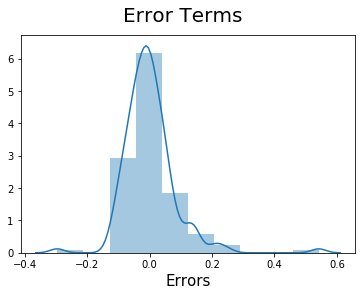

In [56]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 10)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 15)  

##### By looking into the  graph we can assume that the error terms are normally distributed. Hence linear model is satisfied.

### Prediction of test


In [57]:
#Scaling the test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [58]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [59]:
# Now let's use our model to make predictions.
X_train_7 = X_train_7.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_7 = X_test[X_train_7.columns]

# Adding a constant variable 
X_test_7 = sm.add_constant(X_test_7)

In [60]:
# Making predictions
y_pred = lm.predict(X_test_7)

### Evaluation of test 

In [61]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.7576598204165055

Text(0, 0.5, 'y_pred')

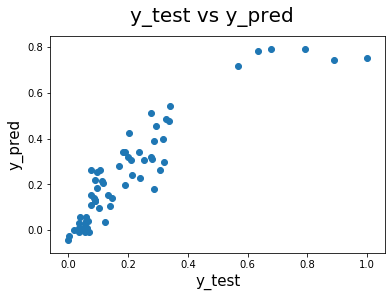

In [62]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=15)                         
plt.ylabel('y_pred', fontsize=15) 

In [63]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     189.1
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           5.79e-55
Time:                        19:06:37   Log-Likelihood:                 150.59
No. Observations:                 143   AIC:                            -291.2
Df Residuals:                     138   BIC:                            -276.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0803      0.023     -3.440      0.0

#### Conclusion :

1. *R-sqaured and Adjusted R-squared (extent of fit)* - 0.846 and 0.841 - `85%` variance explained.
2. *F-stats and Prob(F-stats) (overall model fit)* - 189.1 and 5.79e-55(approx. 0.0) - Model fit is significant and explained `85%` variance is just not by chance.
3. *p-values* - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.